<h4 style="color:#7171C6;">Exercise 7.1 steady no heat generation</h4>

<img src="img/conduction-numerical-steady-fixedT.png" width="300px"/>

A plane wall of length 2m has a temperature of 60$^o$C at the left boundary and  20$^o$C at the right boundary. The conductivity of the material is k = 28W/mK.

The solution is simple, since Fourier's conduction equation for a constant conductivity in this case is a linear gradient. Applying this to the nodes the solution temperature distribution becomes: <br>
[60 50 40 30 20]

We will solve the problem numerically using the finite difference discretization discussed in class.

Left boundary condition
$$T_0 = T_{\textrm{left}}$$
Right boundary condition
$$T_4 = T_{\textrm{right}}$$
Internal nodes
$$\frac{T_{i-1} - 2T_i+T_{i+1}}{\Delta x^2}=0 $$


[ 60.  35.  10.  15.  20.]


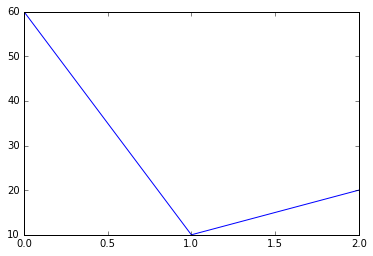

In [8]:
# ******************************************
# 1. PRELOAD MODULES
# ******************************************
import numpy as np                
from matplotlib import pyplot as plt   
%matplotlib inline  
# if you're using sagemathcloud the las line isn't needed


# ******************************************
# 2. Set up the geometry
# ******************************************
# length of material
L = 2

# number of nodes (0 to 4 inclusive)
nx = 5

# distance between nodes
dx = L/(nx-1)


# ******************************************
# 3. Setup the nodes
# ******************************************
# create a 1D array of nodes where the nodes have a value of 10-degrees
# Later test the effect of different initial temperature value instead of 10 

T = np.ones(nx)*10

# set the boundary condictions T_left = 60, T_right = 20
T[0] = 60
T[nx-1] = 20


# ******************************************
# 4. Solve the problem
# ******************************************
# write out the discretized equation using array slicing and array arithmetic 
# this is just like vector addition

T[1:-1] = (T[2:] + T[0:-2])/2



# ******************************************
# 5. Post process data 
# ******************************************
# print the array T, and then plot it using plt.plot(....)
print(T)
plt.plot(np.linspace(0,L,nx), T)



We have only performed one iteration which shows that the solution hasn't reached a linear profile. We can say that the solution hasn't converged. We need to iterate continuously until convergence is achieved. 

We add a continuous loop to repeat the iterations and then introduce a convergence criteria based on residuals. We can calculate the residuals based on the change in values between the new and previous iteration values.

10 ) resid: 0.0513663447709
20 ) resid: 0.00156379813059
[ 60.          49.97070312  39.97070312  29.97070312  20.        ]


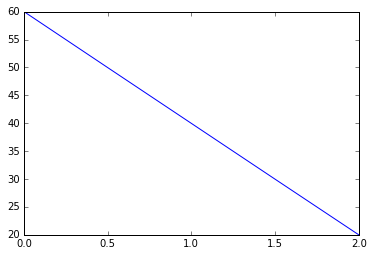

In [16]:
# ******************************************
# 6. Settings for iterations
# ******************************************
# since the array gets updated after iterating we should store the old values to allow 
# a calculation to see the changes after each iteration
# length of material
L = 2
# number of nodes (0 to 4 inclusive)
nx = 5
# distance between nodes
dx = L/(nx-1)

T = np.ones(nx)*10   
T[0] = 60
T[nx-1] = 20
T_old = np.array(T)

# set a convergence criteria value for the residual. After doing some runs you can
# return here and see what effect the criteria has on the solution
criteria = 0.001     

# in case we never reach convergence, set a maximum number of iterations to solve for
maxIteration = 5000   

# set initial iteration counter to 0, and an initial residual counter larger than the criteria
# initial iteration counter
iteration =  0 

# set any number larger than criteria to the iteration
residual = 1  


# ******************************************
# 7. Solver
# ******************************************
# Use a while loop to let the iterations run until the residual is smaller than the criteria set
# place the discretized formula defined in Step 4, into the while loop
# store the array into T_old
# increment the iteratrion number
# check if the iteration has reached its maximum iterations and break the iterator if needed
# e.g. if iteration > maxIteration:
#        break
# The residual equation can be written as np.sqrt(sum((T - T_old)**2))

while residual > criteria:         # continuously loop while residual > criteria
    T[1:-1] = (T[2:] + T[0:-2])/2
    
    residual = sum((T - T_old)/T)   # calculate the residual
    T_old = np.array(T)             # store the Temperature values into Told
    iteration +=1                   # increment the iteration counter
    if np.mod(iteration, 10) == 0:  # print every 10th iteration
        print (iteration, ') '  'resid:', residual)  # print the results
    
    if iteration > maxIteration:   # ensure the while loop doesn't go on forever
        break        
    
    
            
# ******************************************
# 8. Process the results
# ******************************************
# plot the results
print(T)
plt.plot(np.linspace(0,L,nx), T)



# ******************************************
# 9. Conclusion
# ******************************************
# i) how confident are you about the solution reached is accurate?
# ii) what effect does changing the residual criteria have on the solution?
# iii) what happens if you increase the number of nodes?

<h4 style="color:#7171C6;">Exercise 7.2 steady state - heat flux and convection boundary conditions</h4>

<img src="img/conduction-numerical-steady-heatFlux-conv-BC.png" width="300px"/>
The problem is slightly more complicated whenre the boundary conditions are now a  heat flux at the left boundary, a convection heat transfer at the right boundary. The equations setup only changes for these boundaries and are given as: 

Left boundary condition
$$T_0 = \frac{q_{\textrm{left}}\Delta x}{k} + T_{1}$$
Right boundary condition
$$T_4 = \frac{(hx/k)T_{\infty} + T_3}{1 + hx/k} $$

Note that the discretization for the internal nodes remain the same:

Internal nodes
$$\frac{T_{i-1} - 2T_i+T_{i+1}}{\Delta x^2}=0 $$

* <span style="color:#00aa00;"> The free stream temperature (T_inf = 20 degrees)</span>
* <span style="color:#00aa00;">The heat transfer coefficient is 15 W/m2K</span>
* <span style="color:#00aa00;">The heat flux at the left boundary is 200 W/m2</span>
* <span style="color:#00aa00;">The thermal conductivity of the material is 28 W/mK </span>

113 0.000971927560097
[ 47.90404881  44.32369745  40.73498202  37.13006215  33.51677821]


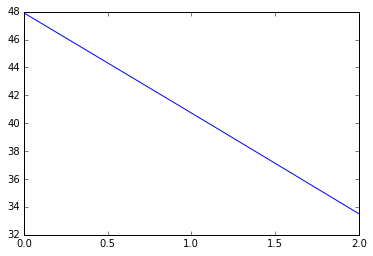

In [19]:
# ******************************************
# 1. PRELOAD MODULES (if you haven't done so from exercise 7.1)
# ******************************************
import numpy as np                
from matplotlib import pyplot as plt   
%matplotlib inline

# ******************************************
# 2. Set up the geometry (same geometry as exercise 7.1)
# ******************************************
# length of material
L = 2
# number of nodes (0 to 4 inclusive)
nx = 5
# distance between nodes
dx = L/(nx-1)

# ******************************************
# 3. Define the variables
# ******************************************
# define the freestream temperature, heat flux, material conductivity, heat transfer coefficient
# free stream temperature for convection [K]
T_inf = 20

# heat flux at left boundary [W/m2]
qLeft = 200

# material conductivity [W/mK]
kCond = 28

# heat transfer coefficient [W/m2K]
hConv = 15 


# ******************************************
# 4. Settings for iterations
# ******************************************
# Set initial node values with a temperatur of 50-deg, later test the effect of different numbers
T = np.ones(nx)*50

# Store node values in a temporary array, called T_old
T_old = np.array(T)

# set a convergence criteria
# return here and see what effect the criteria has on the solution
criteria = 0.001     

# set maximum number of iterations
maxIteration = 1000   

# set initial iteration counter to 0
iteration =  0    

# set residual to 1
residual = 1      


# ******************************************
# 5. Solve the problem (similar to exercise 7.1)
# ******************************************
# use a while loop, write the boundary condition equations, then the internal node equation
# check residual, and convergence criteria, 
# store the array into T_old
# increment the iteratrion number
# check if the iteration has reached its maximum iterations and break the iterator if needed
# e.g. if iteration > maxIteration:
#        break
# The residual equation can be written as np.sqrt(sum((T - T_old)**2))

while residual > criteria:         # continuously loop while residual > criteria
    T[0] = qLeft*dx/kCond + T[1]   # left heat flux boundary
    T[nx-1] = (hConv*dx/kCond * T_inf + T[nx-2])/(1+hConv*dx/kCond) # right convection boundary
    T[1:-1] = (T[2:] + T[0:-2])/2  # internal nodes
    
    residual = np.sqrt(sum((T - T_old)/T)**2)   # calculate the residual
    T_old = np.array(T)             # store the Temperature values into Told
    iteration +=1
    #print (iteration, residual)  # might be too many to print
    if iteration > maxIteration:
        break                      # stop the iteration if the maximum has been reached

print(iteration, residual)
print(T)
plt.plot(np.linspace(0,L,nx), T)


# ******************************************
# 6. Conclusion
# ******************************************
# i) what are the left boundary and right boundary temperatures?
# ii) what is the effect of a higher heat flux?
# iii) what is the effect of a higher heat transfer coefficient?

<h4 style="color:#7171C6;">ADDITIONAL STUDY EXERCISE: 2D and 3D models</h4>
Solve the steady state solution for a 2D rectangular block with the following temperature boundary conditions:

<img src="img/2D-heat-conduction.png" width="200px"/>

The 2D-heat equation is:

$$ \frac{\partial ^2 T}{\partial x^2} + \frac{\partial ^2 T}{\partial y^2} = 0$$

Use the same discretization in the 1-D case, but now repeat in the other axis to complete the 2D form.

$$ \frac{T_{i+1,j} - 2 T_{i,j} + T_{i-1,j}}{\Delta x^2} + \frac{T_{i,j+1}-2 T_{i,j} + T_{i,j-1}}{\Delta y^2} = 0$$

We set the cell spacing $\Delta x = \Delta y$ which simplifies the equation

$$ T_{i+1,j} - 2 T_{i,j} + T_{i-1,j} + T_{i,j+1}-2 T_{i,j} + T_{i,j-1} = 0$$


Recall this represents an interior node and is given by $T_{i,j}$
$$T_{i,j} =\frac{ T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}}{4}$$

The interpretation here is that the temperature of each interior node is the average of the temperatures of the four neighboring nodes. 

(What do you think it would be for 3D problem? Can you write out the discretized 3D equation??)





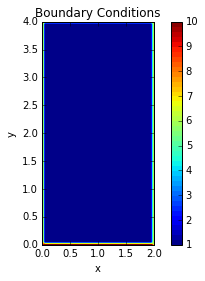

501 3.87619855275
[[  8.          10.          10.         ...,  10.          10.           6.        ]
 [  8.           8.97988234   9.35515231 ...,   8.75571012   7.98251442
    6.        ]
 [  8.           8.56454461   8.91986385 ...,   7.93035755   7.17449777
    6.        ]
 ..., 
 [  8.           7.0655085    6.44524157 ...,   5.45573527   5.67546166
    6.        ]
 [  8.           6.48625159   5.87961569 ...,   5.2801735    5.48888367
    6.        ]
 [  8.           5.           5.         ...,   5.           5.           6.        ]]


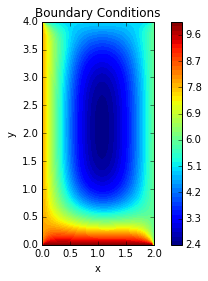

In [20]:
# To solve you need to setup a 2D mesh. Use numpy's 'np.meshgrid'
# example:
#=========
# x = np.linspace(0,2,nx)
# y = np.linspace(0,4,ny)
# T = np.ones((ny,nx)) ##create a 1xn vector of 1's
# X,Y = np.meshgrid(x,y)
# to plot surfaces use plt.contourf


import numpy as np
%matplotlib inline
###variable declarations
xLength = 2;   yLength = 4;
nx = 50
ny = 100
dx = xLength/(nx-1)
dy = yLength/(ny-1)
# in our discretization formulation we set dx = dy, 
# therefore our in this section we must set our mesh to dx = dy as well

x = np.linspace(0,2,nx)
y = np.linspace(0,4,ny)

T = np.ones((ny,nx)) ##create a 1xn vector of 1's
Told = np.array(T)   # store current values of Temperature

X,Y = np.meshgrid(x,y)

# ******************************************
# Assign boundary conditions
# ******************************************
T[0,:]=10
T[-1,:]=5
T[:,0]=8
T[:,-1]=6


fig = plt.figure()
cp = plt.contourf(X, Y, T, 50)
plt.colorbar(cp)
plt.title('Boundary Conditions')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()

# ******************************************
# ITERATION SETTINGS
# ******************************************
criteria = 0.00001     # convergence criteria
maxIteration = 500    # in case we never reach convergence
iteration = 1        # initial iteration counter
residual = 1         # set any number larger than criteria to the iteration


# ******************************************
# SOLVE THE PROBLEM
# ******************************************
while residual > criteria:         # continuously loop while residual > criteria
    
    T[1:-1, 1:-1] = (T[1:-1,2:] + T[1:-1,0:-2] +T[2:,1:-1] +T[0:-2,1:-1] )*0.25
        
    residual = np.sum(np.sqrt(sum((T - Told)/T)**2))   # calculate the residual
    Told = np.array(T)             # store the Temperature values into Told
    iteration +=1
    
    #print (iteration, residual)
    if iteration > maxIteration:
        break                      # stop the iteration if the maximum has been reached

print(iteration, residual)
print(T)


cp = plt.contourf(X, Y, T,50)
plt.colorbar(cp)
plt.title('Boundary Conditions')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()

<h4 style="color:#7171C6;">NOTES: How to setup other types of boundary conditions</h4>


<em>Treatment of boundary nodes - energy balance method</em>
* treat all heat transfer into the volume element from all surfaces except for specified heat flux, since its direction is already specified.
* examples for on convection boundaries were given in class, which are useful for  investigating fins

for a boundary node on a plane surface with convection we get:
$$T_{i,j} = \frac{1}{\left(2 + \phi \right)}\left[  \left( T_{i-1,j} + \frac{T_{i,j+1} + T_{i,j-1}}{2}\right ) +
\phi T_\infty \right]$$

where
$$\phi = \frac{h\Delta x}{k}$$